In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


# Read Data

In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
# drop unecessary columns
df.drop(columns=["CustomerId","Surname","RowNumber"], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# feature extraction
df = pd.get_dummies(df,columns=["Geography", "Gender"], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
# target and features
X = df.drop(columns=['Exited'])
y = df["Exited"]

# Split Dataset

In [12]:
# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
X_train.shape

(8000, 11)

# Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# Model building

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [18]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss="binary_crossentropy", optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5214 - accuracy: 0.7720 - val_loss: 0.4561 - val_accuracy: 0.8006
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7961 - val_loss: 0.4332 - val_accuracy: 0.8106
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8092 - val_loss: 0.4185 - val_accuracy: 0.8219
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8164 - val_loss: 0.4070 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8295 - val_loss: 0.3954 - val_accuracy: 0.8425
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8391 - val_loss: 0.3861 - val_accuracy: 0.8363
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.8459 - val_loss: 0.3768 - val_accuracy: 0.8456

In [22]:
model.layers[0].get_weights()

[array([[ 0.28683427, -0.21422103, -0.19217926, -0.14556165, -0.10300893,
         -0.5504338 , -0.41325134, -0.11198531,  0.03084639, -0.5460281 ,
         -0.18050408],
        [ 0.3513061 , -0.5841921 ,  0.20593612,  0.21406174,  0.22425592,
         -0.3325612 , -0.6023877 , -0.74825543, -0.20823494,  0.9744765 ,
         -0.5650633 ],
        [-0.28243777,  0.19877835, -0.02992867,  0.00583542,  0.13115293,
          0.36255482,  0.5684346 ,  0.01417769, -0.12292041,  0.3968781 ,
         -0.34795758],
        [-0.265247  , -0.02582011,  0.2710593 , -0.25334227,  0.01451427,
         -0.2210054 , -0.41806984, -0.13749522, -0.83056134, -0.08918663,
          0.22493689],
        [ 0.17860149,  0.103935  ,  1.0187945 , -1.2957964 ,  0.7652476 ,
          0.2774662 ,  0.29337502, -0.08320086, -0.2995616 ,  0.10468656,
         -0.27486062],
        [-0.5597099 ,  0.01167004, -0.05919952, -0.08796144, -0.41848513,
         -0.36083725,  0.16732168, -0.5223753 ,  0.5538338 ,  0.0278735

In [23]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 956us/step


In [24]:
y_pred = np.where(y_log>0.5 , 1, 0 )

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8635

In [26]:
import matplotlib.pyplot as plt

In [27]:
history.history

{'loss': [0.5213823318481445,
  0.45640328526496887,
  0.43473124504089355,
  0.41859450936317444,
  0.4043850302696228,
  0.3912297189235687,
  0.3798440992832184,
  0.37046292424201965,
  0.3636579215526581,
  0.3583771884441376,
  0.3545245826244354,
  0.3503189980983734,
  0.3485656976699829,
  0.346709668636322,
  0.3445204198360443,
  0.3437334895133972,
  0.34256067872047424,
  0.34260693192481995,
  0.3413360118865967,
  0.3400484025478363,
  0.3397839367389679,
  0.3387517035007477,
  0.3389962315559387,
  0.33839112520217896,
  0.33774977922439575,
  0.33707547187805176,
  0.33600685000419617,
  0.33576351404190063,
  0.3359602689743042,
  0.3351925313472748,
  0.3346295952796936,
  0.33496028184890747,
  0.33458831906318665,
  0.33377814292907715,
  0.33370426297187805,
  0.33379727602005005,
  0.3332180380821228,
  0.33309677243232727,
  0.3326706290245056,
  0.332614928483963,
  0.33268892765045166,
  0.33221787214279175,
  0.3314507007598877,
  0.33153966069221497,
  0.33

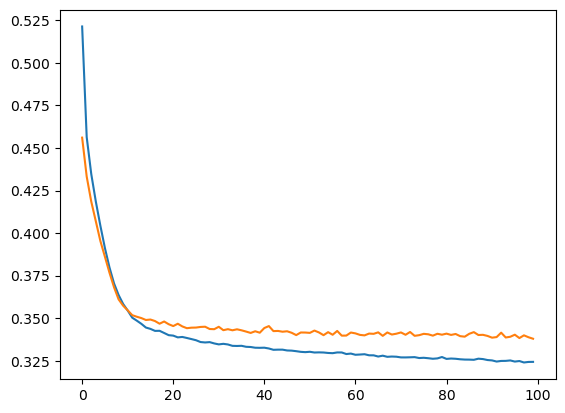

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

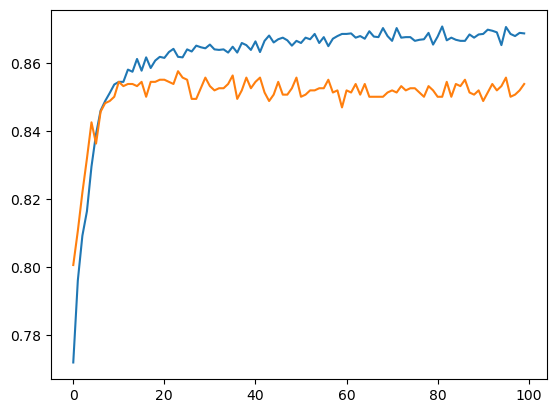

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])